# Домашняя работа 2. Кластеризация методом k-means (k-средних).

Вариант 2. Economics of Cities

Лазарев Эдуард Артемович
N33471

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]

import os

In [3]:
# Загружаем данные
data = pd.read_csv("Economics of Cities/Econom_Cities_data.csv", decimal=",", delimiter=";", index_col='City')
len(data)

48

Проверяем правильность данных

In [4]:
data

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


In [5]:
data.dtypes

Work        int64
Price     float64
Salary    float64
dtype: object

Видим что есть два города для которых неизвестно значение работы и заработной платы. Удалим их как выбросы.

In [6]:
X = data.where(data.values != -9999).dropna()
X

,Work,Price,Salary
City,,,
Amsterdam,1714.0,65.6,49.0
Athens,1792.0,53.8,30.4
Bogota,2152.0,37.9,11.5
Bombay,2052.0,30.3,5.3
Brussels,1708.0,73.8,50.5
Buenos_Aires,1971.0,56.1,12.5
Caracas,2041.0,61.0,10.9
Chicago,1924.0,73.9,61.9
Copenhagen,1717.0,91.3,62.9


Видим что в первом столбце у нас даны часы, а во втором и третьем стобце проценты, причём для Цюриха значение взято за 100%. Стандартизуем первый столбец, так чтобы для Цюриха было тоже 100%.

In [7]:
X["Work"] = X["Work"] / X["Work"]["Zurich"] * 100
X

,Work,Price,Salary
City,,,
Amsterdam,91.755889,65.6,49.0
Athens,95.931478,53.8,30.4
Bogota,115.203426,37.9,11.5
Bombay,109.850107,30.3,5.3
Brussels,91.434690,73.8,50.5
Buenos_Aires,105.513919,56.1,12.5
Caracas,109.261242,61.0,10.9
Chicago,102.997859,73.9,61.9
Copenhagen,91.916488,91.3,62.9


Проведём Кластеризацию методом k-means.

Сначала построим график каменистой осыпи.

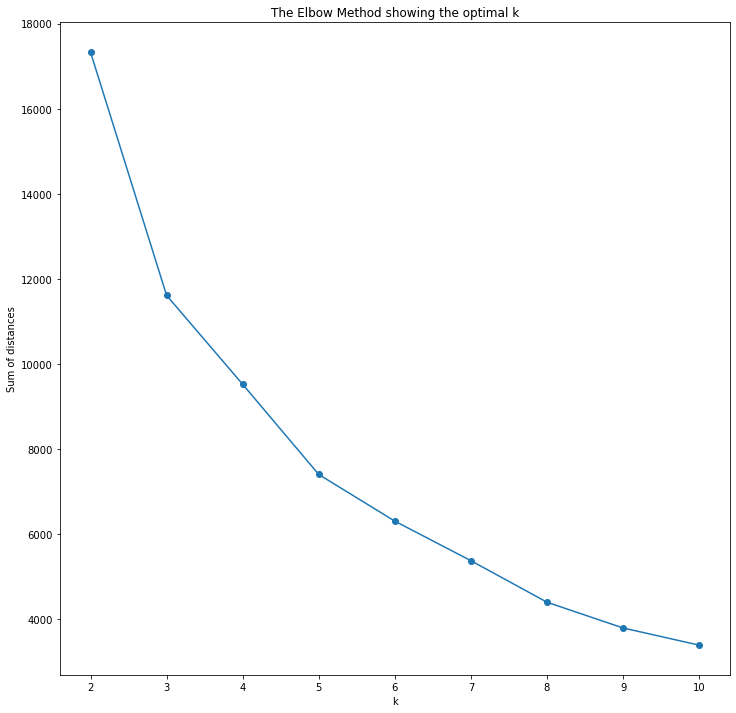

In [10]:
from sklearn.cluster import KMeans

K = range(2, 11)
models = [KMeans(n_clusters=k, random_state=20).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()


На графике видно что после пяти кластеров сумма перестаёт сильно уменьшатся.

Посмотрим на статистику получаемую в этой кластеризации.

In [18]:
model = KMeans(n_clusters=5, random_state=20)
model.fit(X)
X['cluster'] = model.labels_
X

,Work,Price,Salary,cluster
City,,,,
Amsterdam,91.755889,65.6,49.0,2
Athens,95.931478,53.8,30.4,1
Bogota,115.203426,37.9,11.5,3
Bombay,109.850107,30.3,5.3,3
Brussels,91.434690,73.8,50.5,2
Buenos_Aires,105.513919,56.1,12.5,3
Caracas,109.261242,61.0,10.9,3
Chicago,102.997859,73.9,61.9,2
Copenhagen,91.916488,91.3,62.9,2


In [19]:
for cluster in sorted(set(X["cluster"].tolist())):
    print(f"In cluster {cluster}:", X[X["cluster"] == cluster].index.values)

In cluster 0: ['Helsinki' 'Oslo' 'Stockholm' 'Tokyo']
In cluster 1: ['Athens' 'Hong_Kong' 'Johannesburg' 'Lisbon' 'Nicosia' 'Seoul' 'Singpore'
 'Tel_Aviv']
In cluster 2: ['Amsterdam' 'Brussels' 'Chicago' 'Copenhagen' 'Dublin' 'Dusseldorf'
 'Frankfurt' 'Houston' 'London' 'Los_Angeles' 'Luxembourg' 'Madrid'
 'Milan' 'Montreal' 'New_York' 'Paris' 'Sydney' 'Taipei' 'Toronto'
 'Vienna']
In cluster 3: ['Bogota' 'Bombay' 'Buenos_Aires' 'Caracas' 'Kuala_Lumpur' 'Lagos'
 'Manila' 'Mexico_City' 'Nairobi' 'Panama' 'Rio_de_Janeiro' 'San_Paulo']
In cluster 4: ['Geneva' 'Zurich']


In [20]:
X[["Work", "Price", "Salary"]].describe()

,Work,Price,Salary
count,46.000000,46.000000,46.000000
mean,100.637743,70.100000,39.545652
std,9.333113,21.389177,24.757703
min,84.743041,30.300000,2.700000
25%,93.428801,51.775000,14.375000
50%,98.982869,70.950000,43.650000
75%,105.794968,81.900000,59.700000
max,127.141328,115.500000,100.000000


In [23]:
X.groupby("cluster").mean()

,Work,Price,Salary
cluster,,,
0,92.813169,113.850,59.375000
1,104.242505,57.850,25.637500
2,96.876338,77.865,54.125000
3,107.164525,46.100,8.641667
4,100.321199,97.950,95.150000


In [24]:
X.groupby("cluster").size()

cluster
0     4
1     8
2    20
3    12
4     2
dtype: int64

## Вывод

Проведя кластеризацию методом k-means мы получили пять кластеров. 
Можно заметить что полученные кластера в данной домашней работе не сильно отлечаются от результатов прошлой работы, где мы использовали иерархический кластерный анализ. Поэтому дальнейшие выводы не будут сильно отличаться от вывода в первой домашней работе.

Смотря на полученную статистику по кластерам можно заметить что все города работают почти одинаково и значение столбца с часами работы скорее всего не сильно влияло на кластеризацию.

Далее следует интерпретация самих кластеров.

Начнём с самого очевидного кластера, четвёртого. В нём мы получили два города: Женеву и Цюрих. В этих городах самые высокие зарплаты (примерно в два раза больше среднего по выборке). Так как все значения исходных данных были представлены относительно Цюриха, то и в этом кластере средние значения всех трёх критериев близки к 100%.

В третьем кластере у нас находятся города с самым низким значением заработной платы (в среднем меньше в пять раз по сравнению со средним значение по всей выборке) и цен на продукты. В данный кластер вошли города южных стран, что логично сочетается с полученными результатами.

В первом кластере у нас города в которых экономическая обстановка немного лучше третьего кластера, но всё ещё низкая.

Во втором кластере у нас города со средним значением по всей выборке. Так же можно заметить что таких городов большинство.

В нулевом кластере у нас находятся города в которых самая большая разница между ценой продуктов и зарплатой (в два раза).
